In [1]:
import matplotlib.pyplot as plt
import numpy as np

from gaussians import generate_observations, likelihood, visualize_observations

# Data generation

Here we can see that we can generate data of different dimensions, and we know the true underlying Gaussian distributions.

In [2]:
source_kwargs, weights, true_labels, observations = generate_observations(
    N=100, dimensions=1, K=3,
)
for w, kwargs in zip(weights, source_kwargs):
    print(f"Weight {w:.3f}: {kwargs}")

for label, observation in zip(true_labels[:3], observations[:3]):
    print(f"From gaussian {label}: {observation}")

Weight 0.220: {'loc': array([8.06921718]), 'scale': array([0.6345094])}
Weight 0.497: {'loc': array([1.34304851]), 'scale': array([0.5239506])}
Weight 0.283: {'loc': array([0.8483528]), 'scale': array([1.97537029])}
From gaussian 2: [-1.78371739]
From gaussian 0: [6.74093554]
From gaussian 1: [1.58645722]


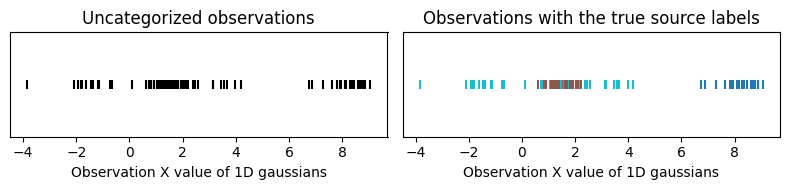

In [3]:
figure, axes = plt.subplots(1, 2, figsize=(8, 2))
visualize_observations(axes[0], observations, marker="|")
visualize_observations(axes[1], observations, true_labels, marker="|")

axes[0].set_title("Uncategorized observations")
axes[1].set_title("Observations with the true source labels")
for axis in axes:
    axis.set_yticks([])
    axis.set_xlabel("Observation X value of 1D gaussians")
figure.tight_layout()

In [4]:
source_kwargs, weights, true_labels, observations = generate_observations(
    N=100, dimensions=2, K=3,
)
for w, kwargs in zip(weights, source_kwargs):
    print(f"Weight {w:.3f}: {kwargs}")

for label, observation in zip(true_labels[:3], observations[:3]):
    print(f"From gaussian {label}: {observation}")

Weight 0.279: {'loc': array([4.8061171 , 4.79361105]), 'scale': array([1.44938595, 1.63804884])}
Weight 0.262: {'loc': array([6.98732307, 3.57221678]), 'scale': array([0.72828197, 1.93873723])}
Weight 0.459: {'loc': array([6.87516769, 9.07044222]), 'scale': array([1.78046608, 1.65393972])}
From gaussian 0: [6.45534872 2.83467155]
From gaussian 2: [7.30803542 7.82685514]
From gaussian 0: [4.32205308 5.89961713]


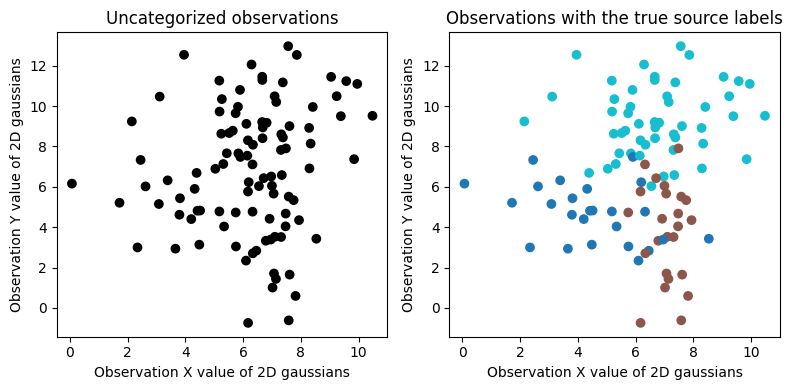

In [5]:
figure, axes = plt.subplots(1, 2, figsize=(8, 4))
visualize_observations(axes[0], observations)
visualize_observations(axes[1], observations, true_labels)

axes[0].set_title("Uncategorized observations")
axes[1].set_title("Observations with the true source labels")
for axis in axes:
    axis.set_ylabel("Observation Y value of 2D gaussians")
    axis.set_xlabel("Observation X value of 2D gaussians")
figure.tight_layout()

# Expectation (E-Step)

$$
\begin{aligned}
&TODO make key \\
w_j^i &= \frac{
    p\left( x^i | z^i = j ; \theta_j^{(t)} \right) p\left( z^i = j \right)
}{
    \sum_{l=1}^K{ p\left( x^i | z^i = l ; \theta_l^{(t)} \right) p\left( z^i = l \right) }
}
&& \text{$w_j^i$ is the weight given to observation $i$ matching to source $j$} \\
\end{aligned}
$$

Essentially, just calculate the numerator once for each source, then normalize over the sources for that one observation.

In this case, the parameters are $\psi_j$, $\mu_j$, and $\sigma_j$.

In [6]:
# Number of sources
K = 3

# Start off with the assumed source weights uniform
param_psi = np.ones(K) / K

# Choose three random points as the assumed starting means
param_mu = np.array(
    [
        observations[i]
        for i in np.random.choice(range(len(observations)), size=K, replace=False)
    ]
)

# Fix the assumed starting std deviation
param_sigma = np.ones(K) * 2.0

In [7]:
# i x j, aka len(observations) x len(sources)
e_weights = np.zeros((len(observations), K))

# First build the numerators
for i in range(len(observations)):
    for j in range(K):
        e_weights[i, j] = likelihood(observations[i], param_mu[j], param_sigma[j]) * param_psi[j]

# Then normalize by the denominator
for i in range(len(observations)):
    e_weights[i, :] /= np.sum(e_weights[i, :])

print("Do the per-source weights sum to 1 for each observation?")
print(np.sum(e_weights, axis=1).reshape(-1, 1)[:5], "...")

Do the per-source weights sum to 1 for each observation?
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]] ...


### Visualize - do they make sense?

TODO: Modify visualization so that it can heatmap the underlying sources OR the param sources

Could these be a function?

TODO: Scatter observation on top of those

TODO: Draw lines scaled by the weights onto the observation, and add text with the raw weight